In [1]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

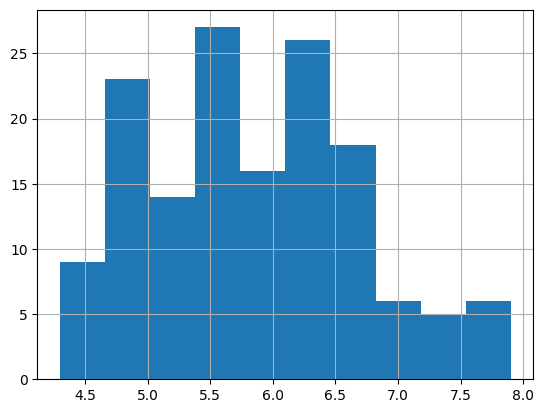

In [9]:
df['SepalLengthCm'].hist()

<Axes: >

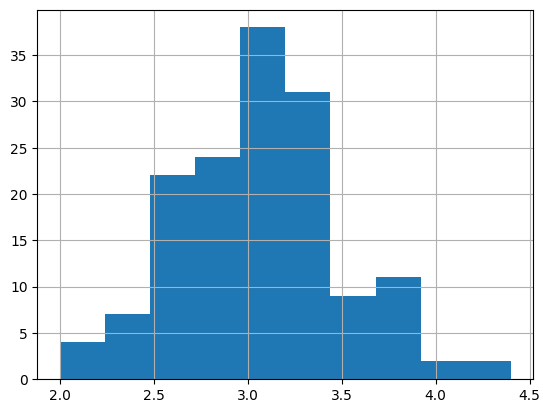

In [10]:
df['SepalWidthCm'].hist()


<Axes: >

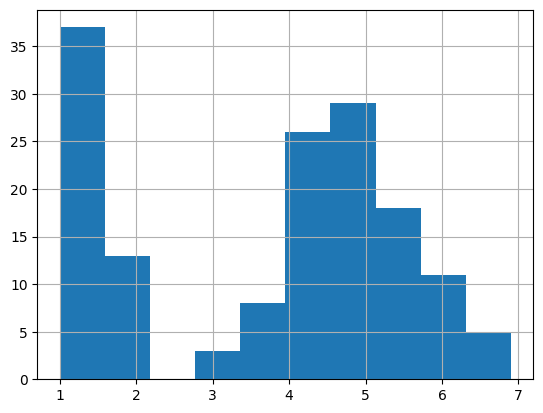

In [11]:
df['PetalLengthCm'].hist()

<Axes: >

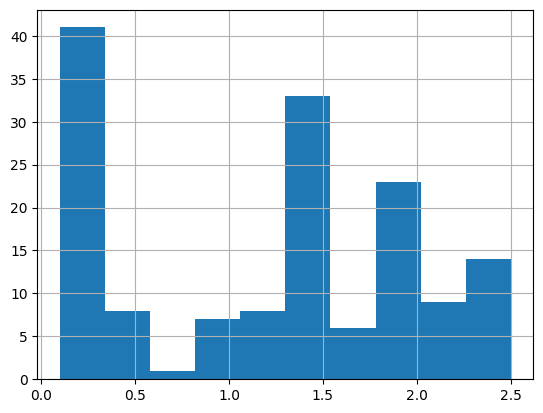

In [12]:
df['PetalWidthCm'].hist()

In [13]:
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

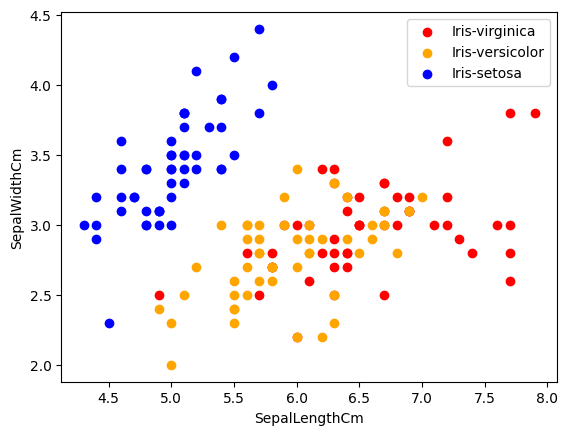

In [14]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

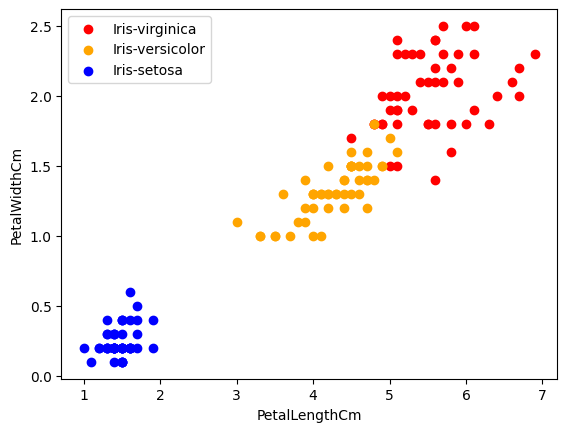

In [15]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

In [16]:
df_sp=df

In [17]:
df_sp=df_sp.drop(columns=['Species'])

In [18]:
df_sp.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

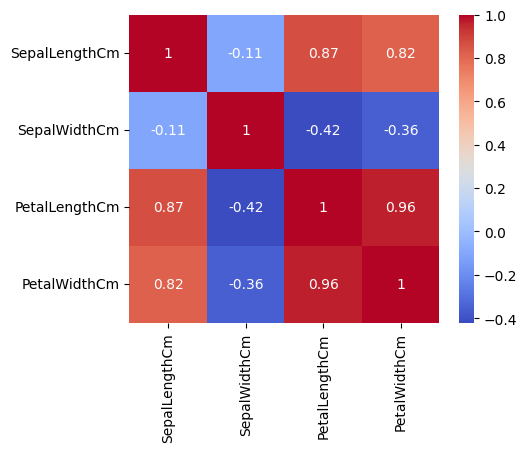

In [19]:
corr=df_sp.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True, ax=ax,cmap='coolwarm')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

X=df.drop(columns=['Species'])
Y=df['Species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [21]:
# testing models with high accuravy

In [22]:
model=LogisticRegression()
model.fit(X_train,Y_train)
print("Logical Regression Accuracy:",model.score(X_test,Y_test)*100)

Logical Regression Accuracy: 95.55555555555556


In [23]:
model.fit(X_train.values,Y_train.values)

LogisticRegression()

In [24]:
print("Accuracy of Kneighbors Classifier :",model.score(X_test,Y_test)*100)

Accuracy of Kneighbors Classifier : 95.55555555555556


C:\Users\Jouhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [25]:
model=DecisionTreeClassifier()
model.fit(X_train.values,Y_train.values)
print("Decision Tree Accuracy",model.score(X_test,Y_test)*100)

Decision Tree Accuracy 93.33333333333333


C:\Users\Jouhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [26]:
model.fit(X_train.values,Y_train.values)

DecisionTreeClassifier()

In [27]:
print("Accuracy:",model.score(X_test,Y_test)*100)

Accuracy: 100.0


C:\Users\Jouhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [34]:
filename='saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [35]:
filename='saved_model.sav'
try:
    with open(filename,'wb') as file:
        pickle.dump(model,file)
    print("Model saved successfully")
except Exception as e:
    print(f"Error saving the model:{e}")

Model saved successfully


In [36]:
load_model=pickle.load(open(filename,'rb'))

In [37]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [38]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,4.9,2.5,4.5,1.7
113,5.7,2.5,5.0,2.0
116,6.5,3.0,5.5,1.8
67,5.8,2.7,4.1,1.0
140,6.7,3.1,5.6,2.4
